In [1]:
import numpy as np

In [2]:
# defines two points in a 2d space
p1 = np.array([1,1])
p2 = np.array([4,4])

In [5]:
# calculates the distance between them using pythagoras
np.sqrt(np.sum(np.power(p2 - p1,2)))

4.242640687119285

In [9]:
# Turns the above into a function
import numpy as np
p1 = np.array([2,2])
p2 = np.array([4,4])

def distance(p1,p2):
    """Finds the distance between points p1 and p2."""
    return np.sqrt(np.sum(np.power(p2 - p1,2)))


In [12]:
distance(p1,p2)

2.8284271247461903

In [65]:
# My solution
from random import randint
def majority_vote(votes):
    """

    """
    votecount = {}
    for vote in votes:
        if vote in votecount:
            votecount[vote] += 1
        else:
            votecount[vote] = 1
    winners = []
    maxcount = max(votecount.values())
    for vote, count in votecount.items():
        if count == maxcount:
            winners.append(vote)
    if len(winners) > 1:
        return winners[randint(0, len(winners)-1)]
    else:
        return winners[0]

In [87]:
# His solution
import random
def majority_vote(votes):
    """

    """
    votecount = {}
    for vote in votes:
        if vote in votecount:
            votecount[vote] += 1
        else:
            votecount[vote] = 1
    winners = []
    maxcount = max(votecount.values())
    for vote, count in votecount.items():
        if count == maxcount:
            winners.append(vote)
    return random.choice(winners)

In [81]:
votes = [1,2,3,2]

In [86]:
majority_vote(votes)

2.0

In [85]:
# His shorter solution - do not use as it does not select at random
import scipy.stats as ss
def majority_vote(votes):
    """

    """
    mode, count = ss.mstats.mode(votes)
    return mode[0]

In [105]:
# loop over all points
    # compute the dtsiance between point p and every other point
# sort distances and return k nearest points to point p
def find_nearest_neighbors(p, points, k=5):
    """Fidns the k nearest neighbors of point p and return their indices."""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p,points[i])
    ind = np.argsort(distances)
    return ind[0:k]
        
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5,2])

In [97]:
find_nearest_neighbors(p)

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

(0.5, 3.5, 0.5, 3.5)

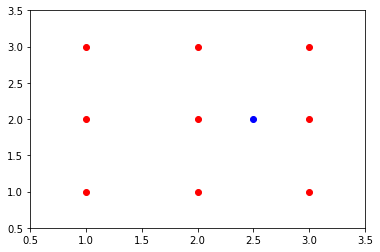

In [93]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0],p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])

In [100]:
ind = np.argsort(distances)

In [101]:
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2], dtype=int64)

In [103]:
distances[ind[0:2]]

array([0.5, 0.5])

In [108]:
ind = find_nearest_neighbors(p, points, 3); print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [109]:
def knn_predict(p,points,outcomes,k=5):
    # find k nearest neighbors
    ind = find_nearest_neighbors(p, points, k)
    # predict the class of p based on majority vote
    return majority_vote(outcomes[ind])

In [110]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [111]:
len(outcomes)

9

In [114]:
knn_predict(np.array([1,2.7]),points,outcomes,k=2)

0

In [127]:
def generate_synth_data(n=50):
    """Creates two sets of points from bivariate normal distributions."""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return (points, outcomes)

In [117]:
ss.norm(0,1).rvs((5,2))
ss.norm(1,1).rvs((5,2))

array([[ 1.5066425 ,  3.2155947 ],
       [ 0.26078815,  0.80831972],
       [ 0.920519  , -0.43640448],
       [ 1.95754397,  1.16574221],
       [ 0.6736666 ,  2.42198891]])

In [128]:
n = 20

In [129]:
(points, outcomes) = generate_synth_data(n)

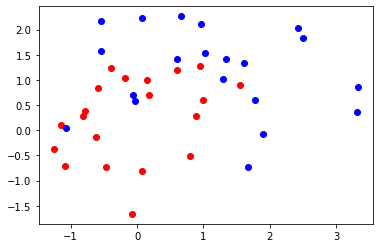

In [130]:
plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")
plt.savefig("bivariate.pdf")

In [142]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classifies each point on the prediction grid."""
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min,x_max,h)    
    ys = np.arange(y_min,y_max,h)
    xx, yy = np.meshgrid(xs,ys)
    prediction_grid = np.zeros(xx.shape,dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p,predictors,outcomes,k)
    return(xx, yy, prediction_grid)


In [135]:
# enumerate tutorial
seasons = ["spring","summer","fall","winter"]
list(enumerate(seasons))
for ind, season in enumerate(seasons):
    print (ind, season)

0 spring
1 summer
2 fall
3 winter


In [139]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [137]:
(predictors, outcomes) = generate_synth_data()

<ipython-input-139-bf3e93cec0e7>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


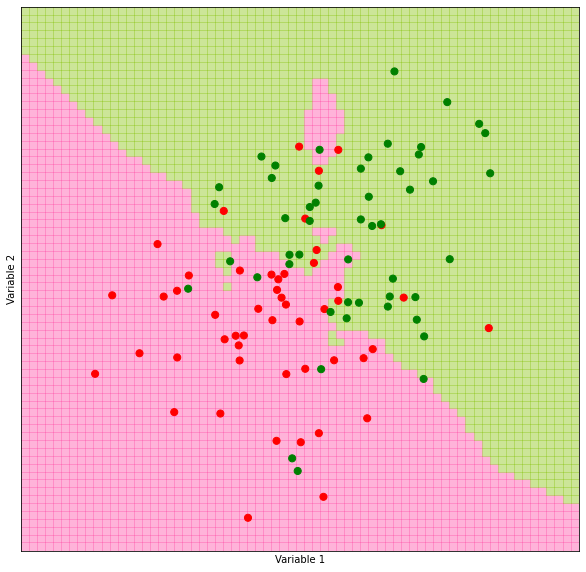

In [143]:
k = 5; filename="knn_synth5.pdf"; limits = (-3,4,-3,4); h = 0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx,yy,prediction_grid, filename)

<ipython-input-139-bf3e93cec0e7>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


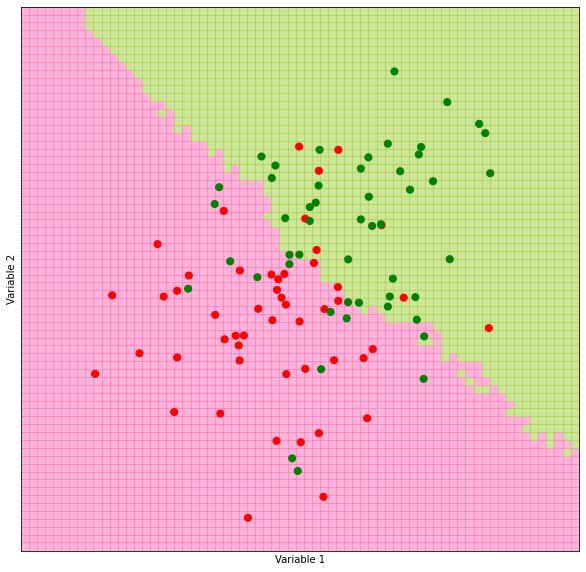

In [144]:
k = 50; filename="knn_synth50.pdf"; limits = (-3,4,-3,4); h = 0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx,yy,prediction_grid, filename)

In [145]:
from sklearn import datasets
iris = datasets.load_iris()

In [146]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [147]:
predictors = iris.data[:,0:2]
outcomes = iris.target

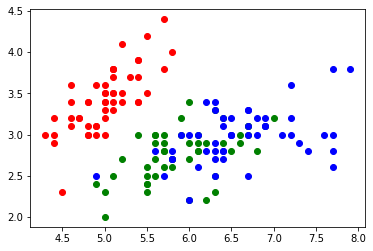

In [153]:
plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==1][:,1],"go")
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==2][:,1],"bo")
plt.savefig("iris.pdf")

<ipython-input-139-bf3e93cec0e7>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


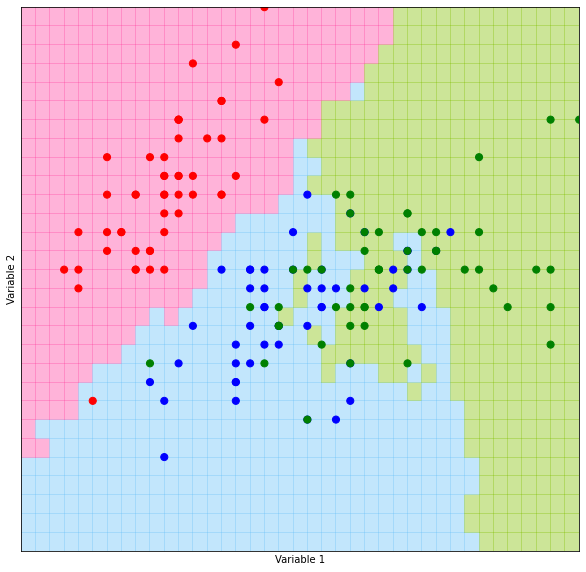

In [154]:
k = 5; filename="irisgrid.pdf"; limits = (4,8,1.5,4.5); h = 0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx,yy,prediction_grid, filename)

In [156]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [157]:
sk_predictions.shape

(150,)

In [158]:
sk_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1])

In [159]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [160]:
my_predictions.shape

(150,)

In [161]:
my_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [163]:
print(np.mean(sk_predictions == my_predictions)*100)

96.0


In [164]:
print(np.mean(sk_predictions == outcomes)*100)

83.33333333333334


In [165]:
print(np.mean(my_predictions == outcomes)*100)

84.66666666666667


In [166]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  